In [ ]:
                                                      LINEAR REGRESSION IN PYTHON

In [ ]:
#Linear Regression
Linear regression is a fundamental statistical and machine learning technique used to model the relationship between a dependent variable (target) and one or more independent variables (predictors). 
It is used for predicting continuous values.

#The equation of a straight line in algebra,
#Types of Linear Regression
Simple Linear Regression – Involves one independent variable.
y=mx+c
Understanding the Components
y → Dependent variable (output or target we want to predict)
x → Independent variable (input feature used for prediction)
m → Slope (coefficient) (shows how much y changes when x increases by 1)
c → Intercept (the value of y when 𝑥=0, also called the bias term)

Multiple Linear Regression – Involves multiple independent variables.

𝑦= 𝑚1𝑥1 + 𝑚2𝑥2 + m3x3 +....+ mnxn

In [ ]:
#Assumptions of Linear Regression
Linearity – The relationship between independent and dependent variables is linear.
    
Independence – Observations are independent of each other.
    
Homoscedasticity – The variance of residuals (errors) is constant.
    
Normality – The residuals should be normally distributed.
    
No Multicollinearity – Independent variables should not be highly correlated.

In [ ]:
#The dataset is the Boston Housing Dataset, which contains information about housing in Boston, Massachusetts. 

#It consists of 506 rows and 14 columns, where each row represents a different house and its characteristics.


# Column Descriptions:
crim  –  Per capita crime rate by town.
    
zn  –  Proportion of residential land zoned for large lots (over 25,000 sq. ft.).

indus – Proportion of non-retail business acres per town.

chas – Charles River dummy variable (1 if the house is near the river, 0 otherwise).

nox – Nitrogen oxide concentration (pollution level, in parts per 10 million).

rm – Average number of rooms per dwelling.
    
age – Proportion of owner-occupied units built before 1940.

dis – Weighted distance to five major employment centers.

rad – Accessibility to radial highways.
    
tax – Property tax rate per $10,000.

ptratio – Pupil-teacher ratio by town.
    
b –    A measure related to the percentage of Black residents (formula: 𝐵=1000(𝐵𝑘−0.63)2, where Bk is the proportion of Black residents).

lstat – Percentage of lower-status population.
    
medv – Median value of owner-occupied homes (in $1000s) (Target variable for prediction).


#Key Insights:
The dataset is used for regression analysis, particularly predicting house prices (medv).

Features such as rm (number of rooms) and lstat (lower status population percentage) tend to be strong predictors of house price.
    
chas is a categorical variable, while others are mostly continuous.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
print(pd.read_csv)  # showing a function reference, not a string


C:\Users\vaibh\OneDrive\Desktop\File\BostonHousing.csv


In [5]:
df = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\File\BostonHousing.csv")

In [11]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
df.shape

(506, 14)

In [19]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [23]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [27]:
print(df.columns)

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [39]:
# Checking correlation with the target variable (medv)
#df.corr() → Computes the correlation matrix for all numerical columns in the dataset.
#df.corr()["medv"] → Extracts the correlation values of all columns with the target variable medv (Median House Value).
#.sort_values(ascending=False) → Sorts the correlations in descending order so that the most positively correlated features appear at the top.

correlation = df.corr()["medv"].sort_values(ascending=False)

In [41]:
correlation

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [43]:
#Split the dataset into training and testing sets

X = df.drop(columns=["medv"])  # Features
y = df["medv"]  # Target variable

In [45]:
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [47]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [49]:
from sklearn.model_selection import train_test_split

In [51]:
#Splitting the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression

In [53]:
#  Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
#  Make predictions
y_pred = model.predict(X_test)

In [57]:
y_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [63]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

In [65]:
# Output evaluation metrics
mae, mse, rmse, r2

(3.1890919658878416, 24.291119474973478, 4.928602182665332, 0.6687594935356326)

In [ ]:
#After running the Linear Regression model, we obtained the following results:

Mean Absolute Error (MAE): 3.19 → On average, the predictions are off by about $3,190.

Mean Squared Error (MSE): 24.29 → Measures the average squared difference between actual and predicted values.
    
Root Mean Squared Error (RMSE): 4.93 → The average error in predicting house prices is about $4,930.

R² Score: 0.669 → The model explains 66.9% of the variance in house prices.

A higher R² score (closer to 1) would indicate a better fit.

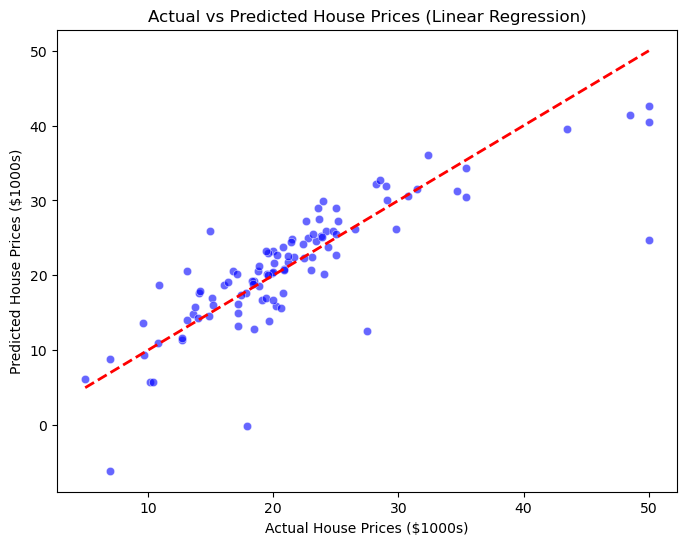

In [67]:
# Step 7: Plot actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", linewidth=2)
plt.xlabel("Actual House Prices ($1000s)")
plt.ylabel("Predicted House Prices ($1000s)")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()